# Test 26: F-test for the overall mean of K subpopulations (analysis of variance)

## Objective

- There are $K$ treatment groups
- From each of $K$ treatment groups, I have samples of size $n_1, n_2, ... n_k$

- 2 questions:
    1. Are my population means all equal? i.e. $\bar{\mu_1} = \bar{\mu_2} = ... = \bar{\mu_k}$
    2. Is the overall mean different from some hypothesised value? i.e. $\mu = \mu_0$

## Assumptions

- Each of the $K$ samples are independent of each other
- The subpopulations should all be normally distributed 
- The subpopulations should all have the same variance

## Method

### Test for equality of population means ($\bar{\mu_1} = \bar{\mu_2} = ... = \bar{\mu_k}$)

### Test for difference in overall mean and hypothesised mean ($\mu = \mu_0$)

## Example

- Problem
    - A nutritional researcher wishes to test the palatability of 6 different formulations of vitamin/mineral supplement which are added to children’s food. 
    - These differ only in their taste. 
    
    - Are they equally palatable? 
    - Do they, overall, produce a given average consumption of food?

In [10]:
import scipy

group_size = 5

n1=n2=n3=n4=n5=n6 = group_size
K = 6
N = group_size * K

hypothesised_mean = 1500

sum_x1 = 1505
sum_x2 = 1528
sum_x3 = 1564
sum_x4 = 1498
sum_x5 = 1600
sum_x6 = 1470

xbar = (sum_x1+sum_x2+sum_x3+sum_x4+sum_x5+sum_x6) / K
s1_sq = 56360
s2_sq = 58824

n_times_x_minus_mu_sq = 22687.5

test_statistic_1 = (s1_sq / (K-1)) / (s2_sq / (N-K))
critical_value_1 = scipy.stats.f(dfn=K-1, dfd=N-K).ppf(0.95)

test_statistic_2 = n_times_x_minus_mu_sq / (s1_sq / (K-1))
critical_value_2 = scipy.stats.f(dfn=1, dfd=K-1).ppf(0.95)

## Proof that test statistics follow $F$ distribution

In [28]:
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [44]:
# [(x,y) for x,y in zip(np.random.uniform(1,5,4), np.random.uniform(1,5,4))]

In [99]:
K = 4
MU = [5] * K
SIGMA = [2] * K
SAMPLE_SIZE = [500] * K
OVERALL_SIZE = np.sum(SAMPLE_SIZE)
HYPOTHESISED_MEAN = 5

def get_test_statistic_for_all_means_equal():
    samples = [np.random.normal(x,y,z) for x,y,z in zip(MU, SIGMA, SAMPLE_SIZE)]
    sample_means = [np.mean(x) for x in samples]
    overall_mean = np.sum([np.sum(x) for x in samples]) / OVERALL_SIZE

    s1_sq = np.sum([
        n * (x - overall_mean)**2 for n, x in zip(SAMPLE_SIZE, sample_means)
    ])

    s2_sq = np.sum([
        np.sum((x - xbar)**2) for x, xbar in zip(samples, sample_means)
    ])

    test_statistic = (s1_sq/(K-1)) / (s2_sq / (OVERALL_SIZE - K))
    return test_statistic

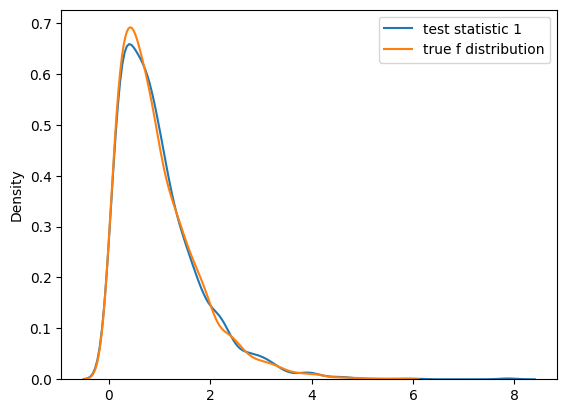

In [100]:
test_statistic_1_distribution = [get_test_statistic_for_all_means_equal() for _ in range(3_000)]
true_f_distribution = np.random.f(dfnum = K-1, dfden = OVERALL_SIZE-K, size=3_000)

sns.kdeplot(test_statistic_1_distribution, label='test statistic 1')
sns.kdeplot(true_f_distribution, label='true f distribution')
plt.legend()

In [186]:
def get_test_statistic_for_overall_mean_equals_mu0(mu0 = HYPOTHESISED_MEAN):
    samples = [np.random.normal(x,y,z) for x,y,z in zip(MU, SIGMA, SAMPLE_SIZE)]
    sample_means = [np.mean(x) for x in samples]
    overall_mean = np.sum([np.sum(x) for x in samples]) / OVERALL_SIZE

    s1_sq = np.sum([
        n * (x - overall_mean)**2 for n, x in zip(SAMPLE_SIZE, sample_means)
    ])

    test_statistic = (OVERALL_SIZE * (overall_mean - mu0)**2) / (s1_sq/(K-1))
    return test_statistic

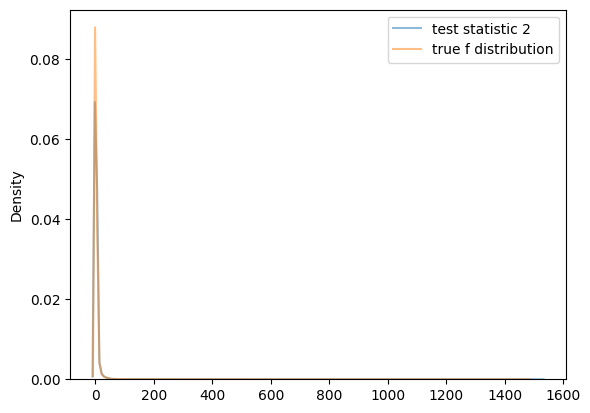

In [196]:
test_statistic_2_distribution = [get_test_statistic_for_overall_mean_equals_mu0(HYPOTHESISED_MEAN) for _ in range(10_000)]
true_f_distribution = np.random.f(dfnum = 1, dfden = K-1, size=10_000)

sns.kdeplot(test_statistic_2_distribution, label='test statistic 2', alpha=0.5)
sns.kdeplot(true_f_distribution, label='true f distribution', alpha=0.5)
# plt.xlim(-10,30)
plt.legend()